<a href="https://colab.research.google.com/github/dominiquebuford/CV_project4/blob/dombuford/CV_captioningv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install -qU openimages torch_snippets urllib3
from torch_snippets import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 13.0 MB/

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
kaggle.json


In [ ]:
!kaggle datasets download -d eeshawn/flickr30k
!unzip flickr30k

In [1]:
import pandas as pd
import numpy as np
!pip install scikit-learn
from sklearn.model_selection import train_test_split

df = pd.read_csv('captions.txt')
paths = df['image_name'].unique().tolist()
train_paths, val_paths = train_test_split(paths, test_size=0.2, random_state=42)

!mkdir train_images
!mkdir val_images


mkdir: cannot create directory ‘train_images’: File exists
mkdir: cannot create directory ‘val_images’: File exists


In [2]:
import os
import shutil

#move training images to correct folder
destination_folder = 'train_images'
for path in train_paths:
  fullName = os.path.join('flickr30k_images', path)
  if os.path.exists(fullName):
        # Construct the new path by combining the destination folder with the basename of the file
        # The basename is the name of the file, extracted from the file_path
        new_path = os.path.join(destination_folder, path)

        # Move the file to the new location
        shutil.move(fullName, new_path)




In [58]:
#move validation images to correct folder
destination_folder = 'val_images'
for path in val_paths:
  fullName = os.path.join('flickr30k_images', path)
  if os.path.exists(fullName):
        # Construct the new path by combining the destination folder with the basename of the file
        # The basename is the name of the file, extracted from the file_path
        new_path = os.path.join(destination_folder, path)

        # Move the file to the new location
        shutil.move(fullName, new_path)

In [3]:
df['train'] = df['image_name'].isin(train_paths)

In [13]:
!pip install torchtext==0.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 984.3 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [4]:
from torchtext.data import Field
from pycocotools.coco import COCO
from collections import defaultdict

captions = Field(sequential=False, init_token='', eos_token='')
all_captions = df[df['train']]['comment'].tolist()
all_tokens = [[w.lower() for w in c.split()] for c in all_captions]
all_tokens = [w for sublist in all_tokens for w in sublist]
captions.build_vocab(all_tokens)


In [5]:
class Vocab: pass
vocab = Vocab()
captions.vocab.itos.insert(0, '')
vocab.itos = captions.vocab.itos

vocab.stoi = defaultdict(lambda: captions.vocab.itos.index(''))
vocab.stoi[''] = 0
for s,i in captions.vocab.stoi.items():
    vocab.stoi[s] = i+1

In [11]:
from torchvision import transforms

class CaptioningDataset(Dataset):
  def __init__(self, root, df, vocab):
    self.root = root
    self.df = df.reset_index(drop = True)
    self.vocab = vocab
    self.transform = transforms.Compose([
        transforms.Resize(224),
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406),
                            (0.229, 0.224, 0.225))]
        )
  def __getitem__(self, index):
    row = self.df.iloc[index].squeeze() #turn row into series
    id = row.image_name
    image_path = f'{self.root}/{id}'
    image = Image.open(os.path.join(image_path)).convert('RGB')
    caption = row.comment
    tokens = str(caption).split()
    target = []
    target.append(vocab.stoi[''])
    target.extend([vocab.stoi[token] for token in tokens])
    target.append(vocab.stoi[''])
    target = torch.Tensor(target).long()
    return image, target, caption
  def choose(self):
    return self[np.random.randint(len(self))]
  def __len__(self):
    return len(self.df)
  def collate_fn(self, data):
    """
    determine how the batches of data are combined in the dataloader-- pad the captions to be length of longest caption
    """
    data.sort(key=lambda x: len(x[1]), reverse=True)
    images, targets, captions = zip(*data)
    images = torch.stack([self.transform(image) for image in images], 0)
    lengths = [len(tar) for tar in targets]
    _targets = torch.zeros(len(captions), max(lengths)).long()
    for i, tar in enumerate(targets):
      end = lengths[i]
      _targets[i, :end] = tar[:end]
    return images.to(device), _targets.to(device), torch.tensor(lengths).long().to(device)



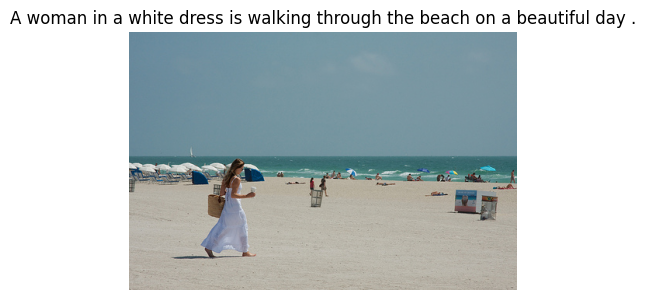

tensor([  2,   0,  13,   5,   3,  21, 115,  10,  41,  61,   6,  82,   7,   3,
        413, 189,   4,   2])

In [13]:
trn_ds = CaptioningDataset('train_images', df[df['train']], vocab)
val_ds = CaptioningDataset('val_images', df[~df['train']], vocab)

image, target, caption = trn_ds.choose()
show(image, title=caption, sz=5); print(target)